Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler


Load the Dataset

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Life_Expectancy_Data.csv to Life_Expectancy_Data (1).csv


Read the CSV file into a DataFrame

In [4]:
df = pd.read_csv('Life_Expectancy_Data.csv')


Inspect the Data

In [5]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2461 non-null   object 
 1   Continent                        2461 non-null   object 
 2   Year                             2461 non-null   int64  
 3   Status                           2461 non-null   object 
 4   Life_expectancy                  2461 non-null   float64
 5   Adult_Mortality                  2461 non-null   int64  
 6   infant_deaths                    2461 non-null   int64  
 7   Alcohol                          2461 non-null   float64
 8   percentage_expenditure           2461 non-null   float64
 9   Hepatitis_B                      1997 non-null   float64
 10  Measles                          2461 non-null   int64  
 11   BMI                             2461 non-null   float64
 12  under_five_deaths   

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
count,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,1997.000000,2461.000000,2461.000000,2461.000000,2453.000000,2309.000000,2461.000000,2461.000000,2461.000000,2461.000000,2458.000000,2458.000000
mean,2007.485169,69.464567,160.961804,31.134498,4.328952,880.115968,80.849775,2361.811865,38.346404,43.204388,82.682022,5.874010,1.893661,7555.989842,4.841040,4.883909,0.633627,12.157933
std,4.601993,9.639385,126.167514,127.249666,4.056351,2143.267664,24.975829,11148.748920,19.908022,172.992761,23.147657,2.395258,5.464583,14337.844932,4.500021,4.592501,0.212276,3.326975
min,2000.000000,36.300000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.400000,0.000000,3.000000,0.370000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.400000,69.000000,0.000000,0.510000,24.733286,77.000000,0.000000,19.200000,0.000000,78.000000,4.230000,0.100000,462.486524,1.600000,1.600000,0.494250,10.200000
50%,2007.000000,72.300000,137.000000,2.000000,3.480000,122.936535,92.000000,15.000000,43.800000,3.000000,93.000000,5.760000,0.100000,1792.384500,3.300000,3.300000,0.686000,12.450000
75%,2011.000000,76.000000,223.000000,19.000000,7.380000,579.738437,96.000000,341.000000,56.100000,24.000000,97.000000,7.530000,0.800000,6171.262444,7.100000,7.100000,0.788000,14.500000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,14.390000,50.600000,119172.741800,27.700000,28.600000,0.948000,20.700000


Identify and Handle Missing Values

1.Check for missing values

In [6]:
df.isnull().sum()


Country                              0
Continent                            0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                              0
percentage_expenditure               0
Hepatitis_B                        464
Measles                              0
 BMI                                 0
under_five_deaths                    0
Polio                                8
Total_expenditure                  152
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income_composition_of_resources      3
Schooling                            3
dtype: int64

2.Handle missing values

In [9]:
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)


Identify and Handle Outliers

1.Visualize outliers using boxplots

<Axes: >

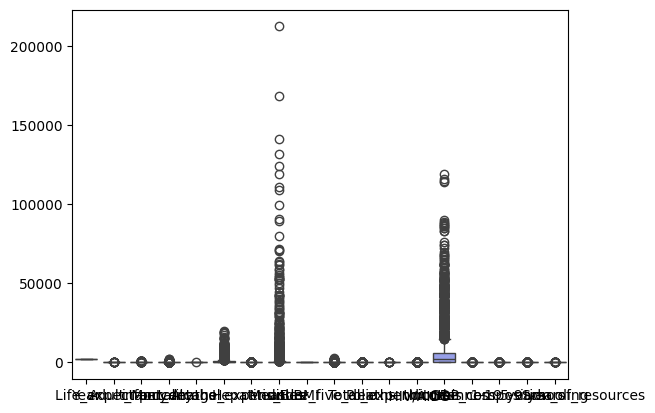

In [11]:
sns.boxplot(data=df)

2.Handle outliers

In [23]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate IQR and filter outliers for numeric columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


Standardize Data Formats and Correct Errors

In [26]:
# Inspect column names and data types
print("Columns in the dataset:")
print(df.columns)
print("\nData types of each column:")
print(df.dtypes)

Columns in the dataset:
Index(['Country', 'Continent', 'Year', 'Status', 'Life_expectancy ',
       'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure',
       'Hepatitis_B', 'Measles ', ' BMI ', 'under_five_deaths ', 'Polio',
       'Total_expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

Data types of each column:
Country                             object
Continent                           object
Year                                 int64
Status                              object
Life_expectancy                    float64
Adult_Mortality                      int64
infant_deaths                        int64
Alcohol                            float64
percentage_expenditure             float64
Hepatitis_B                        float64
Measles                              int64
 BMI                               float64

In [30]:
df.loc[:, 'Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')  # Convert 'Year' to datetime
df.loc[:, 'GDP'] = df['GDP'].astype(float, errors='ignore')  # Convert 'GDP' to float

Remove Duplicates

In [34]:
df = df.drop_duplicates().copy()


Feature Engineering

In [41]:
if 'Life expectancy' in df.columns and 'Income' in df.columns:
    df['new_feature'] = df['Life expectancy'] / df['Income']
print(df.head())
print(df.columns)


    Country Continent       Year      Status  Life_expectancy   \
16  Albania    Europe 2015-01-01  Developing              77.8   
17  Albania    Europe 2014-01-01  Developing              77.5   
18  Albania    Europe 2013-01-01  Developing              77.2   
19  Albania    Europe 2012-01-01  Developing              76.9   
20  Albania    Europe 2011-01-01  Developing              76.6   

    Adult_Mortality  infant_deaths  Alcohol  percentage_expenditure  \
16               74              0     4.60              364.975229   
17                8              0     4.51              428.749067   
18               84              0     4.76              430.876979   
19               86              0     5.14              412.443356   
20               88              0     5.37              437.062100   

    Hepatitis_B  ...  Polio  Total_expenditure  Diphtheria    HIV/AIDS  \
16         99.0  ...   99.0               6.00           99        0.1   
17         98.0  ...   98.0 

Apply Transformation Techniques


In [44]:
# Assuming 'Country' and 'Continent' are the non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Optionally, add back the non-numeric columns if needed
df_scaled['Country'] = df['Country']
df_scaled['Continent'] = df['Continent']


Statistical Methods and Visualization


In [45]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

sns.pairplot(df)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

Ensure Data Quality and Integrity

In [46]:
assert df.isnull().sum().sum() == 0
assert df.duplicated().sum() == 0


Save and Export Cleaned Data


In [47]:
df.to_csv('cleaned_data.csv', index=False)


In [48]:
files.download('cleaned_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>